# Hello World Header

Formatting cheetsheet can be found at: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

## Section 2.2: Some basic data analysis

In [1]:
import pandas as pd
reviews = pd.read_csv("./ign.csv")

Pandas cheatsheet can be found at: http://pandas.pydata.org/pandas-docs/stable/10min.html

The length and width of the DataFrame:

In [2]:
reviews.shape

(18625, 11)

The headers and first few rows of the array

In [3]:
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


How to delete a column

In [4]:
del reviews["Unnamed: 0"]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Get the mean of a column

In [5]:
reviews['score'].mean()

6.950459060402666

This allows you to render matplotlib plots inline rather than as an external jpg.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plot;

This makes all plots make use of the 'ggplot' aesthetic

In [7]:
plot.style.use('ggplot');

Make a histogram of the score data (finish the line with a semicolon to hide the object __repr__

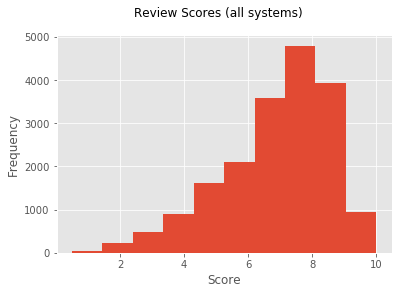

In [8]:
reviews['score'].plot(kind = 'hist');
plot.xlabel('Score');
plot.suptitle("Review Scores (all systems)");

This uses an intelligent index to do filtering in a SQL-ish way

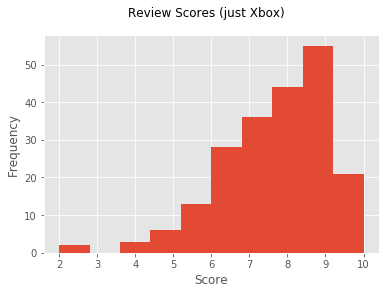

In [9]:
xbox_scores = reviews[reviews['platform'] == 'Xbox One']['score']
xbox_scores.plot(kind = 'hist');
plot.xlabel('Score');
plot.suptitle("Review Scores (just Xbox)");

We can also make boxplots

In [10]:
import seaborn as sns

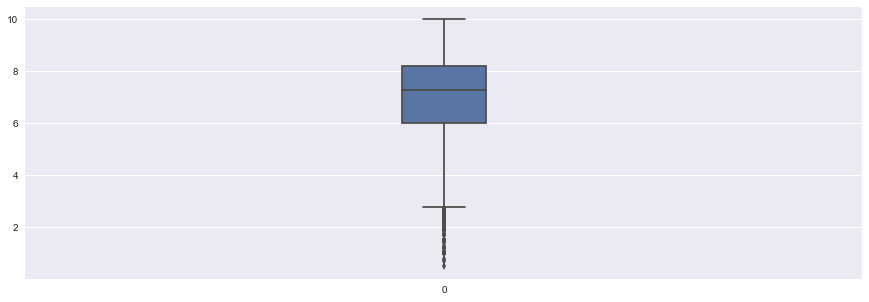

In [11]:
plot.subplots(figsize = (15,5))
sns.boxplot(data = reviews['score'], width = .1);

It's also neat to make an individual plot for each system

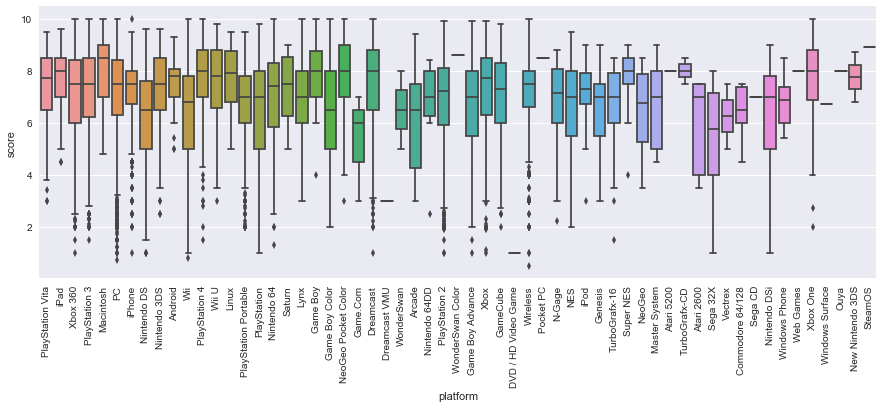

In [12]:
plot.subplots(figsize = (15,5))
reviews_boxplot_by_platform = sns.boxplot(x = 'platform', y = 'score',  data = reviews)

reviews_boxplot_by_platform.set_xticklabels(reviews_boxplot_by_platform.get_xticklabels(), rotation = 90);

## Excercises 2.2:

### 1. Print out the correlation matrix for reviews. 
Anything interesting going on between the numerical values here? Look up the correlation matrix method documentation for pandas data frame. What kind of correlation is being calculated by default? What other options are there?

In [13]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


The strongest correlation is a negative score between release year and release month. This posits the idea that over the years, companies have moved towards releasing earlier in the year.

By default, corr computes the Pearson coefficient. You can also compute Kendall's Tau and Spearman rank correlation by using the __method__ parameter (method='kendall' or method='spearman').

### 2. Create your own visualization of the reviews data set.

In [14]:
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


### 3. Create a histogram of review scores for another platform from the review set.

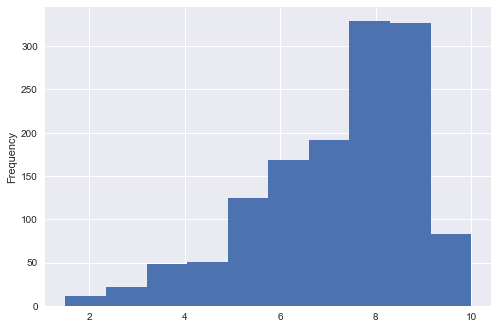

In [15]:
reviews[reviews['platform'] == 'PlayStation 3']['score'].plot(kind = 'hist');

### 4. Use the by argument of matplotlib's .hist function to create a histogram of review scores for every platform in reviews.
Change the size of the plot by using plot.rcParams["figure.figsize"].

# Section 3: Ski-kit Learn

## Section 3.1: Reading in Data

In [11]:
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plot;

In [12]:
digits = datasets.load_digits()

In [13]:
type(digits)

sklearn.datasets.base.Bunch

In [14]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [15]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [17]:
digits_targets = digits.target
digits_targets.shape

(1797,)

In [18]:
digits_images = digits.images
digits_images.shape

(1797, 8, 8)

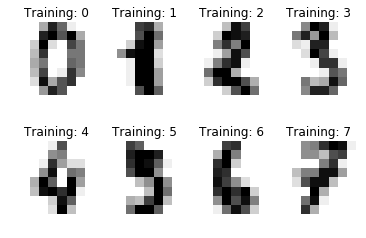

In [19]:
image_label_list = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_label_list[:8]):
    plot.subplot(2, 4, index + 1)
    plot.axis('off')
    plot.imshow(image, cmap = plot.cm.gray_r, interpolation = 'nearest')
    plot.title('Training: ' + str(label))

## Section 3.2: Making Predictions

Starting off with the K-means algorithm. Probably actually a bad one to start with, but it's a starting point.

First, we need to preprocess

In [20]:
from sklearn.preprocessing import scale
data = scale(digits.data)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images, test_size = 0.25, random_state = 489)

In [24]:
x_train.shape

(1347, 64)

In [25]:
x_test.shape

(450, 64)

In [26]:
450 / (450 + 1347)

0.25041736227045075

Making Clusters

In [27]:
from sklearn import cluster

k_means_predictor = cluster.KMeans(n_clusters = 10, random_state = 489)

k_means_predictor.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=489, tol=0.0001, verbose=0)

You can also visualize what the centroid images relating to the clusters look like. Not knowing that K-Means was a bad idea, this would be first hint that something is wrong.

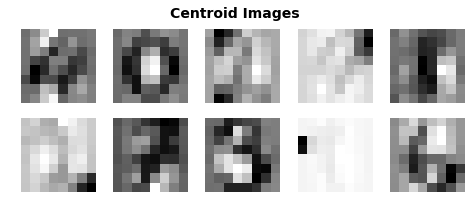

In [28]:
fig = plot.figure(figsize=(8, 3))
fig.suptitle('Centroid Images', fontsize = 14, fontweight = 'bold')

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(k_means_predictor.cluster_centers_[i].reshape((8, 8)), cmap = plot.cm.binary)
    plot.axis('off')

The model has been trained. Now time to test how accurate of a predictor it is.


In [29]:
y_pred_k_means = k_means_predictor.predict(x_test)

The above line used the model that we trained on the x_train data set to predict the labels of the x_test data set. We can evaluate the performance with a confusion matrix. We're going to borrow scikit-learn's plot_confusion_matrix function here:

In [30]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

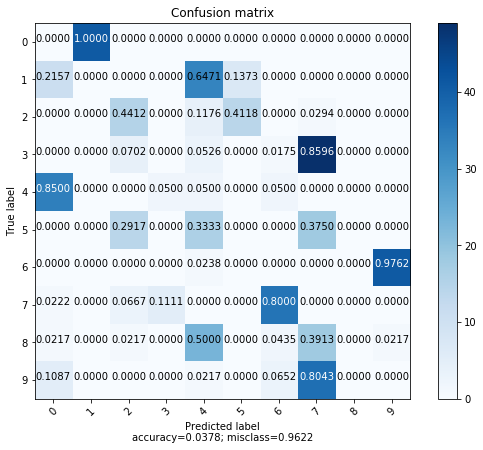

In [32]:
from sklearn.metrics import confusion_matrix


labels = [i for i in range(10)]
k_means_cm = confusion_matrix(y_test, y_pred_k_means, labels)

    
plot_confusion_matrix(k_means_cm, labels)